In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [3]:
data=pd.read_pickle("WM811K.pkl")
df = pd.DataFrame(data)

In [4]:
df.head(11)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,1683.0,none,lot1,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1683.0,none,lot1,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1683.0,none,lot1,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1683.0,none,lot1,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1683.0,none,lot1,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5,1683.0,none,lot1,Training,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,1683.0,none,lot1,Training,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,1683.0,none,lot1,Training,8.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8,1683.0,none,lot1,Training,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9,1683.0,none,lot1,Training,10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         811457 non-null  float64
 1   failureType     811457 non-null  object 
 2   lotName         811457 non-null  object 
 3   trainTestLabel  811457 non-null  object 
 4   waferIndex      811457 non-null  float64
 5   waferMap        811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [9]:
# Select the object type column
object_column = df['failureType']

In [21]:
donut_mask = df['failureType'].apply(lambda x: 'Donut' in x)
donut_df = df[donut_mask]
print(len(donut_df))
donut_df.head(11)

555


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
7316,1091.0,Donut,lot490,Training,13.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,..."
7334,1620.0,Donut,lot534,Training,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7335,1620.0,Donut,lot534,Training,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7338,1620.0,Donut,lot534,Training,10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7339,1620.0,Donut,lot534,Training,11.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7340,1620.0,Donut,lot534,Training,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7342,1620.0,Donut,lot534,Training,14.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7346,1620.0,Donut,lot534,Training,18.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7348,1620.0,Donut,lot534,Training,20.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7877,3002.0,Donut,lot1414,Training,11.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


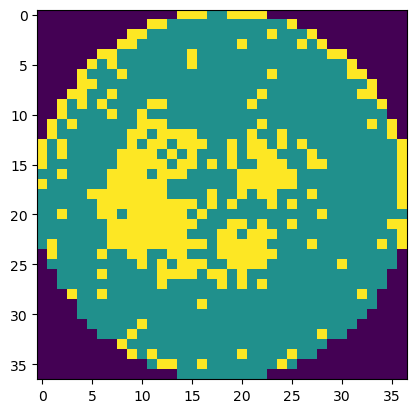

In [51]:
plt.imshow(donut_df.iloc[0]['waferMap'])

In [33]:
center_mask = df['failureType'].apply(lambda x: 'Center' in x)
center_df = df[center_mask]
print(len(center_df))
center_df.head(11)

4294


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
44,2460.0,Center,lot2,Training,20.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
49,2460.0,Center,lot2,Training,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
604,533.0,Center,lot25,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,..."
729,533.0,Center,lot30,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,..."
893,533.0,Center,lot36,Training,19.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,..."
2603,533.0,Center,lot105,Training,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,..."
3837,533.0,Center,lot155,Training,13.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,..."
4419,533.0,Center,lot178,Training,20.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2,..."
4890,533.0,Center,lot197,Training,16.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,..."
5336,533.0,Center,lot215,Training,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2,..."


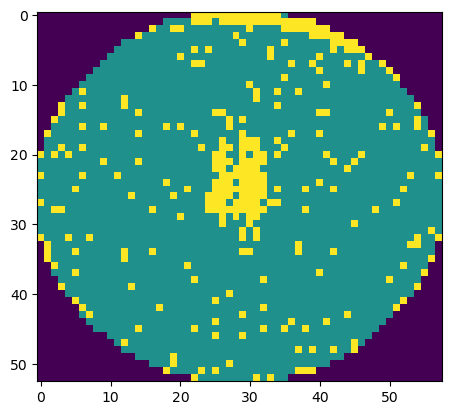

In [43]:
plt.imshow(center_df.iloc[0]['waferMap'])

In [35]:
scratch_mask = df['failureType'].apply(lambda x: 'Scratch' in x)
scratch_df = df[scratch_mask]
print(len(scratch_df))
scratch_df.head(11)

1193


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
134,2460.0,Scratch,lot6,Training,10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
599,533.0,Scratch,lot24,Training,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."
743,533.0,Scratch,lot30,Training,19.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,..."
1592,533.0,Scratch,lot64,Training,18.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,..."
2520,533.0,Scratch,lot102,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,..."
2698,533.0,Scratch,lot109,Training,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,..."
3038,533.0,Scratch,lot122,Training,22.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1,..."
3052,533.0,Scratch,lot123,Training,11.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,..."
3359,533.0,Scratch,lot135,Training,18.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,..."
3940,533.0,Scratch,lot159,Training,16.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."


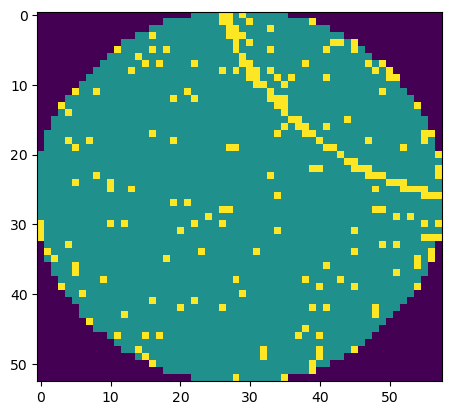

In [45]:
plt.imshow(scratch_df.iloc[0]['waferMap'])

In [37]:
random_mask = df['failureType'].apply(lambda x: 'Random' in x)
random_df = df[random_mask]
print(len(random_df))
random_df.head(11)

866


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
602,533.0,Random,lot25,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."
983,533.0,Random,lot40,Training,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
1199,533.0,Random,lot48,Training,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."
1562,533.0,Random,lot63,Training,13.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1,..."
1721,533.0,Random,lot69,Training,22.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,..."
2100,533.0,Random,lot85,Training,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,..."
2270,533.0,Random,lot92,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,..."
2271,533.0,Random,lot92,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,..."
3423,533.0,Random,lot138,Training,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,..."
3760,533.0,Random,lot152,Training,11.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,..."


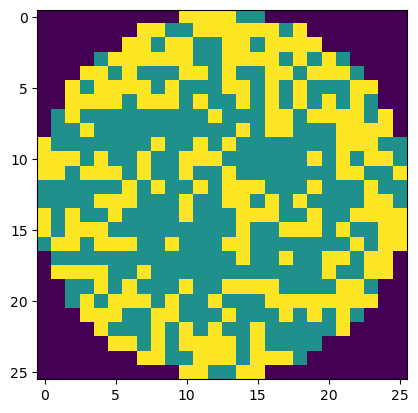

In [53]:
plt.imshow(random_df.iloc[0]['waferMap'])

In [39]:
nearfull_mask = df['failureType'].apply(lambda x: 'Near-full' in x)
nearfull_df = df[nearfull_mask]
print(len(nearfull_df))
nearfull_df.head(11)

149


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
929,533.0,Near-full,lot38,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
2219,533.0,Near-full,lot90,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
3143,533.0,Near-full,lot127,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
3541,533.0,Near-full,lot142,Training,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
3980,533.0,Near-full,lot161,Training,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
4297,533.0,Near-full,lot173,Training,23.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
5372,533.0,Near-full,lot216,Training,23.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,..."
6340,533.0,Near-full,lot255,Training,18.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
243685,553.0,Near-full,lot15211,Training,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,..."
245311,1724.0,Near-full,lot15361,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


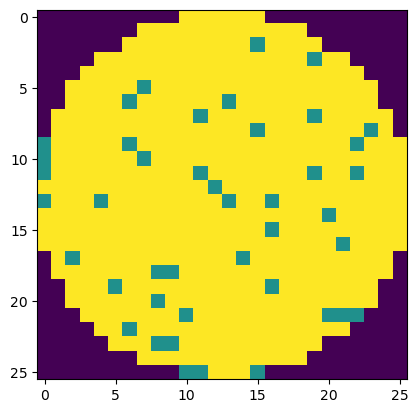

In [55]:
plt.imshow(nearfull_df.iloc[0]['waferMap'])

In [29]:
EdgeLoc_mask = df['failureType'].apply(lambda x: 'Edge-Loc' in x)
EdgeLoc_df = df[EdgeLoc_mask]
print(len(EdgeLoc_df))
EdgeLoc_df.head(11)

5189


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
36,2460.0,Edge-Loc,lot2,Training,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
37,2460.0,Edge-Loc,lot2,Training,13.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
38,2460.0,Edge-Loc,lot2,Training,14.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
39,2460.0,Edge-Loc,lot2,Training,15.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
41,2460.0,Edge-Loc,lot2,Training,17.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
42,2460.0,Edge-Loc,lot2,Training,18.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
43,2460.0,Edge-Loc,lot2,Training,19.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
48,2460.0,Edge-Loc,lot2,Training,24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
264,533.0,Edge-Loc,lot11,Training,15.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,..."
377,533.0,Edge-Loc,lot16,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,..."


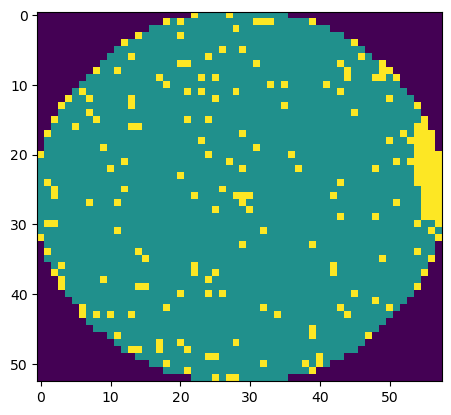

In [57]:
plt.imshow(EdgeLoc_df.iloc[0]['waferMap'])

In [31]:
EdgeRing_mask = df['failureType'].apply(lambda x: 'Edge-Ring' in x)
EdgeRing_df = df[EdgeRing_mask]
print(len(EdgeRing_df))
EdgeRing_df.head(11)

9680


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
100,2460.0,Edge-Ring,lot5,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
186,533.0,Edge-Ring,lot8,Training,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,..."
3445,533.0,Edge-Ring,lot139,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
4562,533.0,Edge-Ring,lot184,Training,13.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."
4845,533.0,Edge-Ring,lot195,Training,21.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,..."
5107,533.0,Edge-Ring,lot206,Training,8.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,..."
5358,533.0,Edge-Ring,lot216,Training,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,..."
6071,533.0,Edge-Ring,lot244,Training,24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,..."
6085,533.0,Edge-Ring,lot245,Training,13.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,..."
6673,533.0,Edge-Ring,lot269,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1,..."


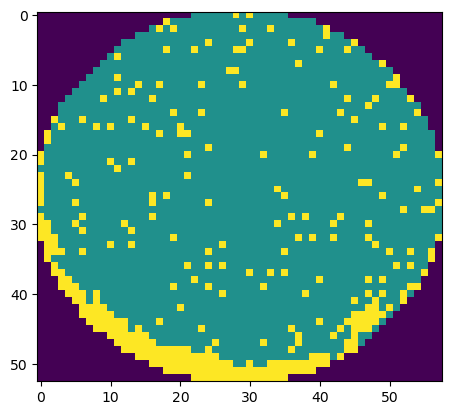

In [59]:
plt.imshow(EdgeRing_df.iloc[0]['waferMap'])

In [61]:
none_mask = df['failureType'].apply(lambda x: 'none' in x)
none_df = df[none_mask]
print(len(none_df))
none_df.head(11)

147431


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,1683.0,none,lot1,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1683.0,none,lot1,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1683.0,none,lot1,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1683.0,none,lot1,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1683.0,none,lot1,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5,1683.0,none,lot1,Training,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,1683.0,none,lot1,Training,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,1683.0,none,lot1,Training,8.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8,1683.0,none,lot1,Training,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9,1683.0,none,lot1,Training,10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


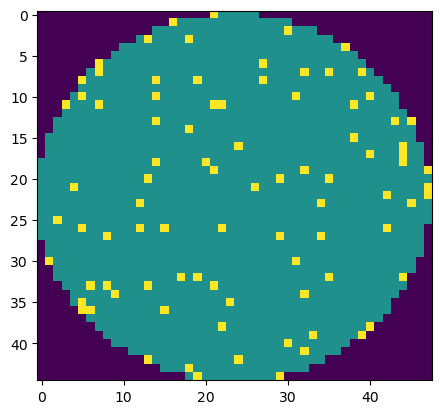

In [63]:
plt.imshow(none_df.iloc[0]['waferMap'])

In [69]:
loc_mask = df['failureType'].apply(lambda x: 'Loc' in x and 'Edge-Loc' not in x)
loc_df = df[loc_mask]
print(len(loc_df))
loc_df.head(11)

3593


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
19,1683.0,Loc,lot1,Training,20.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
40,2460.0,Loc,lot2,Training,16.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
47,2460.0,Loc,lot2,Training,23.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
73,2460.0,Loc,lot3,Training,24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
646,533.0,Loc,lot26,Training,22.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,..."
680,533.0,Loc,lot28,Training,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,..."
824,533.0,Loc,lot33,Training,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
1048,533.0,Loc,lot42,Training,24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2,..."
1242,533.0,Loc,lot50,Training,18.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
1574,533.0,Loc,lot63,Training,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,..."


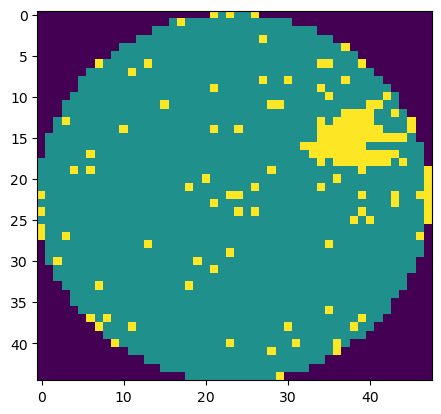

In [67]:
plt.imshow(loc_df.iloc[0]['waferMap'])

In [19]:
df.head(10)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,1683.0,none,lot1,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1683.0,none,lot1,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1683.0,none,lot1,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1683.0,none,lot1,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1683.0,none,lot1,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5,1683.0,none,lot1,Training,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,1683.0,none,lot1,Training,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,1683.0,none,lot1,Training,8.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8,1683.0,none,lot1,Training,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9,1683.0,none,lot1,Training,10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [71]:
# Select training and test data
train_data = df[df['trainTestLabel'].apply(lambda x: 'Training' in x if isinstance(x, (list, np.ndarray)) else x == 'Training')]
test_data= df[df['trainTestLabel'].apply(lambda x: 'Test' in x if isinstance(x, (list, np.ndarray)) else x == 'Test')]

In [73]:
train_data.head(11)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,1683.0,none,lot1,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1683.0,none,lot1,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1683.0,none,lot1,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1683.0,none,lot1,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1683.0,none,lot1,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5,1683.0,none,lot1,Training,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,1683.0,none,lot1,Training,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,1683.0,none,lot1,Training,8.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8,1683.0,none,lot1,Training,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9,1683.0,none,lot1,Training,10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [75]:
test_data.head(11)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
639663,533.0,none,lot40328,Test,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,..."
639664,533.0,none,lot40328,Test,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,..."
639665,533.0,none,lot40328,Test,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,..."
639666,533.0,none,lot40328,Test,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,..."
639667,533.0,none,lot40328,Test,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,..."
639668,533.0,none,lot40328,Test,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,..."
639669,533.0,none,lot40328,Test,7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,..."
639670,533.0,none,lot40328,Test,8.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,..."
639671,533.0,none,lot40328,Test,9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,..."
639672,533.0,none,lot40328,Test,10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."


In [77]:
test_data.index

Index([639663, 639664, 639665, 639666, 639667, 639668, 639669, 639670, 639671,
       639672,
       ...
       811445, 811446, 811447, 811448, 811449, 811450, 811451, 811452, 811453,
       811454],
      dtype='int64', length=118595)

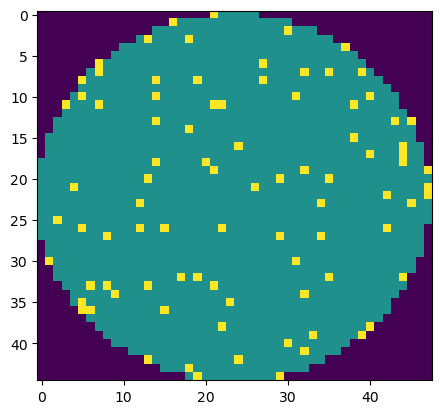

In [79]:
plt.imshow(train_data.iloc[0]['waferMap'])

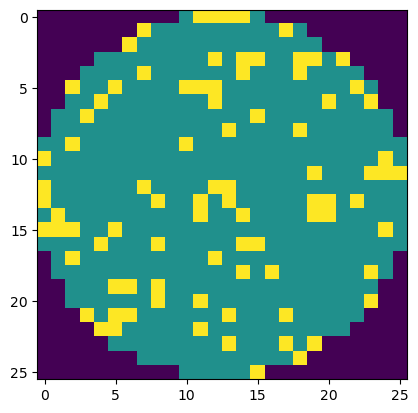

In [81]:
plt.imshow(test_data.iloc[0]['waferMap'])

In [ ]:
# Define the LeNet5 network

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20) # 20 classes of people's faces
        self.fc4_expression = nn.Linear(20, 7) #Which of the 7 expressions
        self.fc4_mitchell = nn.Linear(20, 1) # Is it Mitchell

    # The forward function is now correctly defined inside the LeNet5 class
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        is_mitchell = torch.sigmoid(self.fc4_mitchell(x))

        expression = self.fc4_expression(x)
        return x, is_mitchell, expression

# Instantiate the model
net = LeNet5()
print("Finished")
print(net)